# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# Extract all rows of data
# For this task, I inspected the table on the site using ChromeDevTools and
# identified where the table body is and its other attributes. 
temp_table = soup.find('tbody')
temp_table_rows = temp_table.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_temp_data = []

# Loop through the scraped data to create a list of rows
for tr in temp_table_rows:
    row_data = [td.text.strip() for td in tr.find_all('td')]
    mars_temp_data.append(row_data)

In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# For this task, I started by dynamically scraping the column headers from the table using list comprhension. 
column_headers = [th.text.strip() for th in temp_table.find_all('th')]

#I then created a pandas DataFrame by combining the table row data i scrapped along with the column headers. 
mars_temp_df = pd.DataFrame(mars_temp_data, columns=column_headers)

In [16]:
# Confirm DataFrame was created successfully
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [17]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [18]:
# Change data types for data analysis
# For this task, I used the .astype() method with a dictionary to make the necessary changes. 

mars_df = mars_temp_df.astype({
    'id': 'object',
    'terrestrial_date': 'datetime64[ns]',
    'sol': 'int32',
    'ls': 'int32',
    'month': 'int32',
    'min_temp': 'float64',
    'pressure': 'float64'
})


In [19]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [ ]:
# 1. How many months are there on Mars?
# For this, I listed all the unique months in the months column of the DataFrame and counted how many there are. 
mars_monts_num = mars_df['month'].unique()
num_of_months = len(mars_monts_num)
num_of_months

12

In [ ]:
# 2. How many sols (Martian days) worth of data are there?
# I used the same approach as above by on chnaging the column to sol. 
num_of_sols = mars_df['sol'].unique()
sols_count = len(num_of_sols)
sols_count

1867

In [ ]:
# 3. What is the average minimum temperature by month?
# For this task, I groued the data by month on minimum temprature and calculated the mean. 
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

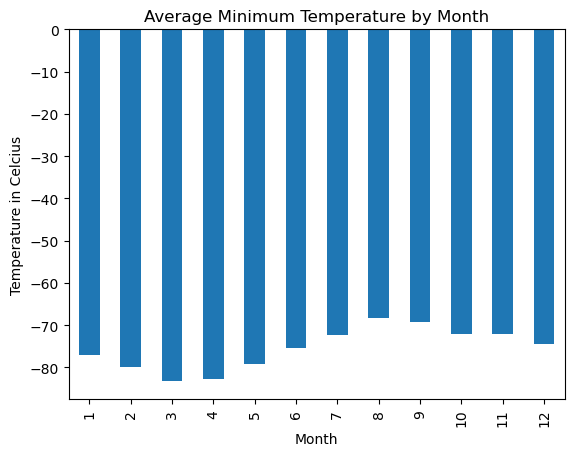

In [25]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Temperature in Celcius')
plt.title('Average Minimum Temperature by Month')
plt.show()

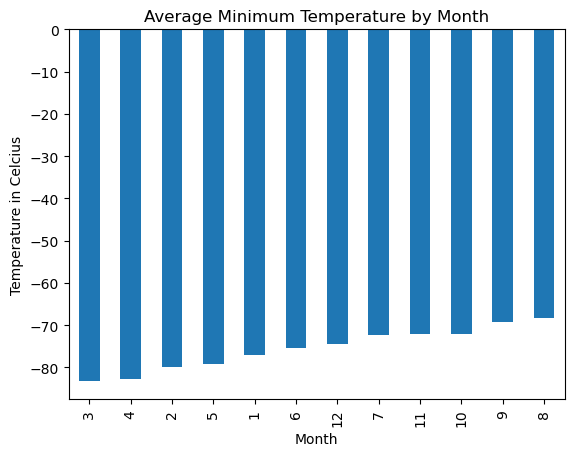

In [26]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# For this task, I sorted the average minimum temperatures by month and plotted the chart again. 
sorted_avg_min_temp = avg_min_temp_by_month.sort_values(ascending=True)
sorted_avg_min_temp.plot(kind='bar', xlabel='Month', ylabel='Temperature in Celcius')
plt.title('Average Minimum Temperature by Month')
plt.show()


In [34]:
# 4. What is the average pressure by month?
avg_press_by_month = mars_df[['month', 'pressure']].groupby('month').mean()
print(avg_press_by_month)

         pressure
month            
1      862.488506
2      889.455056
3      877.322917
4      806.329897
5      748.557047
6      745.054422
7      795.105634
8      873.829787
9      913.305970
10     887.312500
11     857.014493
12     842.156627


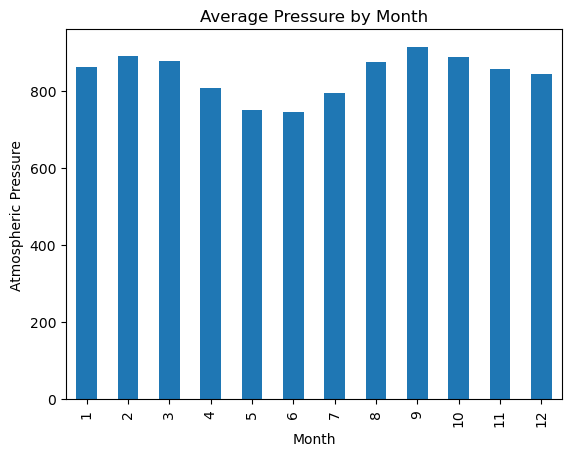

In [37]:
# Plot the average pressure by month
avg_press_by_month.plot(kind='bar', xlabel='Month', ylabel='Atmospheric Pressure', legend=False)
plt.title('Average Pressure by Month')
plt.show()

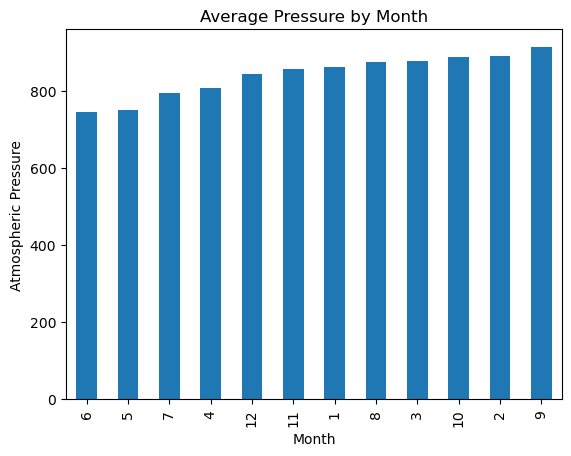

In [41]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# For this task, I sorted the average pressures by month in ascending order and re-plotted the bars. 
sorted_avg_pressure = avg_press_by_month.sort_values(by='pressure', ascending=True)
sorted_avg_pressure.plot(kind='bar', xlabel='Month', ylabel='Atmospheric Pressure', legend=False)
plt.title('Average Pressure by Month')
plt.show()

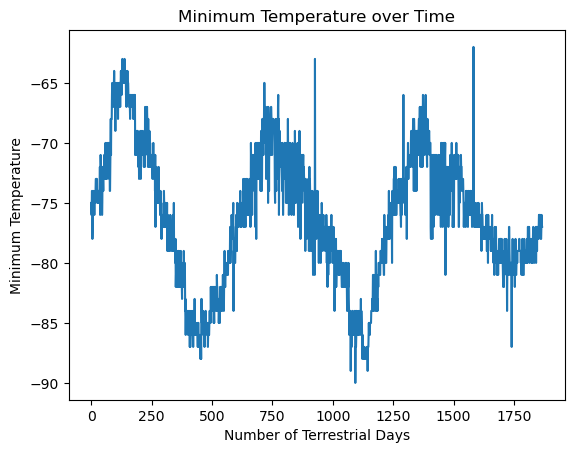

In [46]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
terrestrial_days = mars_df['min_temp']
terrestrial_days.plot(xlabel="Number of Terrestrial Days",
                      ylabel="Minimum Temperature",
                      title="Minimum Temperature over Time")
plt.show()

#### Minimum Temperature
The bar chart shows that Month 3 appears to be the coldest month on Mars with tempreatures approaching -80C. The fourth and second month also have cold temperatures indicating that between month 2 and 4 may be Mars' coldest season. 

Months 8,9, and 10, on the other hand, appear to have relatively warmer average minimum temperatures. This also could indicate the interval for Mars' warmer season. 

These indicators concur with NASA's finding that Mars is similar to earth in having distinct seasons due to both having axis of rotation, 25 degrees for Mars and 23.4 degrees for Earth. Also, according to NASA, a year on Mars lasts 669.6 sols, which is the same as 687 Earth days. 

(https://science.nasa.gov/mars/facts/)


#### Atmospheric Pressure
According to the bar chart for Atmospheric Pressure, the highest atmospheric pressure occurs around the 9th and 10th months. Months 5 and 6 show lowest atmospheric pressure. 

In comparison to the temperatures on Mars, atmospheric pressure is highest when temperatures are warmer and pressure decreases as the temperature is colder. Both observations strengthen the idea that there are seasonal variations in Mars. 


#### Year Length
We can see from the plot showing minimum temperature over time that the temperture cycles repeat approximately every 687 Earth days. This is consitent with astronomical data from MARS suggesting that a full Martian year is about 687 days. (https://science.nasa.gov/mars/facts/) 

Although the years are twice as long on Mars, the fact that the cold and warm periods appearing in regular intervals indicate relative predictability with regard to probable seasons on Mars. 

The chart also indicates that the highest minimum temperatures occur around -65C and the lowest minimums peak around -90C. Some of the spikes and dips may be due to 'short-term weather events' like dust storms according to NASA (https://science.nasa.gov/mars/facts/). 

In conclusion, while a year on Earth lasts about 365 days, a year on Mars lasts 687 Earth days. This leads to longer seasons and more extream weather variations on Mars. 


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [48]:
# Write the data to a CSV
mars_df.to_csv('Output_data/mars_temp_data.csv', )

In [49]:
browser.quit()